 # Assignment 1 COMPSCI-753
 by Bimo Aji Dimas Danindro (bdan569)
 
## [Task 1](#Task-1)
Implement the basic version of the Power Iteration algorithm for PageRank

   - [Implement the power iteration algorithm in matrix form to calculate the rank vector r, without teleport](#Implement-the-power-iteration-algorithm)

   - [Run your code on the provided Google web data](#Run-your-code-on-the-provided-Google-web-data)
     
      Report:
      (1) The running time of your power iteration algorithm;
      (2) The number of iterations needed to stop; 
      (3) The IDs and scores of the top-10 ranked nodes

## [Task 2](#Task-2)

  -[Calculate and report the number of dead-end](#Calculate-and-report-the-number-of-dead-end)

  -[Calculate and plot Leaked Scores](#Calculate-and-plot-Leaked-Scores)
  
  
## [Task 3](#Task-3)
Implementation of Power Iteration with Teleport

  -[Extend PageRank with Teleport](#Extend-PageRank-with-Teleport)

  -[Run Power Iteration with Teleport](#Run-Power-Iteration-with-Teleport)

  -[Vary the teleport probability ](#Vary-the-teleport-probability)

In [31]:
# Importing Library
import time
import numpy as np
import matplotlib.pyplot as plot
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import norm


## Task 1


### Implement the power iteration algorithm

In [32]:
# Function to read file and convert input into sparse matrix
def read_file(file_path, N):
    rows = []
    cols = []
    data = []
    M = []

    # Dictionary to keep track of the number of connections per node
    con_count = {i: 0 for i in range(N)}

    # First phrase: Read file and count connections
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:
                i = int(parts[0])
                j = int(parts[1])
                if i < N and j < N:
                    con_count[i] += 1

    # Second phrase: Read file again and populate the sparse matrix
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) >= 2:
                i = int(parts[0])
                j = int(parts[1])
                if i < N and j < N:
                     # Use normalized weight (1 / number of connections to j)
                    weight = 1 / con_count[i]
                    rows.append(i)
                    cols.append(j)
                    data.append(weight)

        # Create a sparse matrix from the collected data
        M = csr_matrix((data, (rows, cols)), shape=(N, N))
    return M

def power_iteration(M, tol):
    N = M.shape[1]
    r = np.ones(N) / N
    leak_sc = []
    start = time.time()
    iteration = 0
    # While loop for power iteration till meets stopping criteria
    while True:
        r_next = M @ r
        iteration += 1

        # Calculate leaked score for the current iteration
        current_sum = np.sum(r_next)
        if current_sum != 1:
            leaked_score = 1 - current_sum
            leak_sc.append(leaked_score)
                
        # Using L1 norm of the difference as the stopping criteria
        if np.linalg.norm(r_next - r, 1) < tol:
            break
        r = r_next    
    
    end = time.time()
    elap = end - start
    return r, iteration, elap, leak_sc

file_path = '/Users/mac/Documents/compsci/753/web-Google-final.txt'
N = 875713
M = read_file(file_path, N)
print(f"Matrix M\n{M}")
r, iteration, elap, leak_sc = power_iteration(M, tol = 0.02)
print(f"Vector r\n{r}")

Matrix M
  (0, 11342)	0.3333333333333333
  (0, 824020)	0.3333333333333333
  (0, 867923)	0.3333333333333333
  (1, 53051)	0.1111111111111111
  (1, 203402)	0.1111111111111111
  (1, 223236)	0.1111111111111111
  (1, 276233)	0.1111111111111111
  (1, 552600)	0.1111111111111111
  (1, 569212)	0.1111111111111111
  (1, 635575)	0.1111111111111111
  (1, 748615)	0.1111111111111111
  (1, 862566)	0.1111111111111111
  (2, 30957)	0.09090909090909091
  (2, 357310)	0.09090909090909091
  (2, 423174)	0.09090909090909091
  (2, 430119)	0.09090909090909091
  (2, 462435)	0.09090909090909091
  (2, 472889)	0.09090909090909091
  (2, 565424)	0.09090909090909091
  (2, 581609)	0.09090909090909091
  (2, 597621)	0.09090909090909091
  (2, 644135)	0.09090909090909091
  (2, 858904)	0.09090909090909091
  (4, 44695)	0.14285714285714285
  (4, 62391)	0.14285714285714285
  :	:
  (875711, 143415)	0.1
  (875711, 156301)	0.1
  (875711, 307054)	0.1
  (875711, 364056)	0.1
  (875711, 614711)	0.1
  (875711, 695795)	0.1
  (875711, 733

### Run your code on the provided Google web data
1. Report Running Time of Power Iteration
2. Report Number of Iteration
3. Report Top-10 Nodes

In [33]:
# Find the top-10 ranked nodes
top_nodes = np.argsort(-r)[:10]
sc = r[top_nodes]

elap_ms = elap * 1000
print(f"Time required: {elap_ms:.2f} milliseconds")
print(f"Iterations required: {iteration} times")

print("Top-10 ranked nodes and their scores:")
for i, node in enumerate(top_nodes):
    print(f"Node ID: {node}, Score: {sc[i]:.6f}")

Time required: 111.64 milliseconds
Iterations required: 10 times
Top-10 ranked nodes and their scores:
Node ID: 66058, Score: 0.000001
Node ID: 593443, Score: 0.000001
Node ID: 368738, Score: 0.000001
Node ID: 442089, Score: 0.000001
Node ID: 64144, Score: 0.000001
Node ID: 773592, Score: 0.000001
Node ID: 423213, Score: 0.000001
Node ID: 570838, Score: 0.000001
Node ID: 513196, Score: 0.000001
Node ID: 247814, Score: 0.000001


Without teleport, running time for the power iteration need to converge (with stopping criterian in 0.02) after 10 times iteration with running time 111.64 ms.

## Task 2
Understanding dead-ends

### Calculate and report the number of dead-end

In [34]:
# Calculate and report the number of dead-end
num_nodes = M.shape[0]
dead_ends = 0
for i in range(num_nodes):
    if M.getrow(i).nnz == 0:
        dead_ends += 1
print(f"Number of dead ends: {dead_ends}")

Number of dead ends: 187880


### Calculate and plot Leaked Scores

Leaked scores for each iteration:
Iteration 1: 0.214545
Iteration 2: 0.291944
Iteration 3: 0.335633
Iteration 4: 0.368990
Iteration 5: 0.398721
Iteration 6: 0.424912
Iteration 7: 0.449075
Iteration 8: 0.470902
Iteration 9: 0.491253
Iteration 10: 0.509920


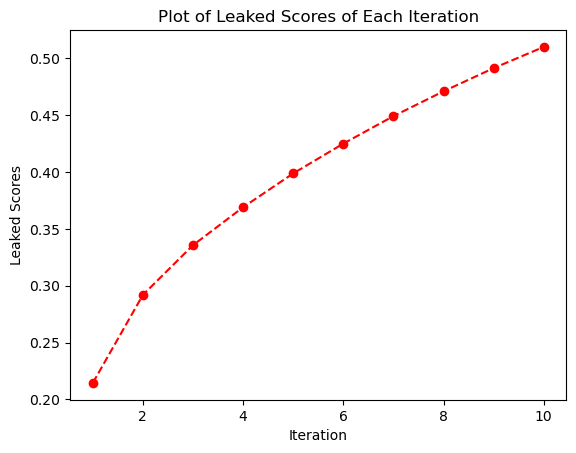

In [35]:
# Get Leaked scores from 1B
# Print leak scores
print("Leaked scores for each iteration:")
for i, score in enumerate(leak_sc):
        print(f"Iteration {i + 1}: {score:.6f}")
iter = list(range(1, len(leak_sc) + 1))

# Plot Leak Score for each iterations
plot.plot(iter, leak_sc, marker='o', linestyle='--', color='r')
plot.xlabel('Iteration')
plot.ylabel('Leaked Scores')
plot.title('Plot of Leaked Scores of Each Iteration')
plot.show()

#### Analyze dead-ends

Plot shows that leaked scores is increasing for each iteration. In the 10th iteration or the last iteration when the r reaching stopping criteria, we already loss more than 50 percent of total score due to dead-ends web in our data.

Output of 2(A) indicates that google web data had total 187880 dead-ends. Dead-ends do not contribute to the rank distribution, therefore when the rank does not flow through the network as it should, the total rank might be *falsely* increased. This can result in an escalating leaked score, where the accumulation effect causes leaked score to increase with each repetition. Without the ability to teleport, there is no way to guarantee that the rank is reset or distributed evenly among pages. Because there is no normalisation, the rank might accumulate in dead ends, which raises the score over iterations.


### Task 3
Implementation of Power Iteration with Teleport

### Extend PageRank with Teleport 

In [36]:
def power_iteration_tele(M, S, tol):
    N = M.shape[0]
    r = np.ones(N) / N
    start = time.time()
    iteration = 0
    while True:
        iteration += 1
        # Step 1 : Calculate the r ranks of current iteration
        r_new = S * (M @ r)
        # Step 2 : update beta
        S = np.sum(r_new)
        # Step 3 : Update r_new with teleport
        r_new = r_new + np.full(N, (1 - S) / N)
        if np.linalg.norm(r_new - r, 1) < tol:
            break
        r = r_new
    end = time.time()
    elap = end - start
    return r, iteration, elap


# beta and tolerance
b = 0.9
tol = 0.02
# Execute
M = read_file(file_path, N)
v_t, iteration_t, elap_t = power_iteration_tele(M, b, tol)
print(r)


[7.64294889e-07 6.27915346e-07 1.07603859e-06 ... 0.00000000e+00
 8.55659436e-07 1.06945788e-06]


### Run Power Iteration with Teleport

In [37]:
# Find the top-10 ranked nodes from result in 3A
top_nodes_t = np.argsort(-v_t)[:10]
sc_t = r[top_nodes_t]

elap_tms = elap_t * 1000
print(f"Time required : {elap_tms:.2f} mili seconds")
print(f"Iterations required: {iteration_t} times")

print("Top-10 ranked nodes and their scores:")
for i, node in enumerate(top_nodes_t):
    print(f"Node ID: {node}, Score: {sc_t[i]:.6f}")

Time required : 115.52 mili seconds
Iterations required: 9 times
Top-10 ranked nodes and their scores:
Node ID: 700787, Score: 0.000001
Node ID: 523196, Score: 0.000001
Node ID: 619761, Score: 0.000001
Node ID: 796071, Score: 0.000001
Node ID: 271708, Score: 0.000001
Node ID: 796069, Score: 0.000001
Node ID: 619790, Score: 0.000001
Node ID: 619803, Score: 0.000001
Node ID: 477234, Score: 0.000001
Node ID: 174863, Score: 0.000001


### Vary the teleport probability 
β with numbers in the set: {1, 0.9, 0.8, 0.7, 0.6}

In [38]:
beta = [1, 0.9, 0.8, 0.7, 0.6]
tol = 0.02

for b in beta:
    M = read_file(file_path, N)
    r, iteration_t, elap_t = power_iteration_tele(M, b, tol)
    elap_tms = elap_t * 1000
    print(f"For beta = {b}, iteration required is {iteration_t} times and takes {elap_tms:.2f} mili seconds")

For beta = 1, iteration required is 10 times and takes 127.67 mili seconds
For beta = 0.9, iteration required is 9 times and takes 111.60 mili seconds
For beta = 0.8, iteration required is 8 times and takes 99.63 mili seconds
For beta = 0.7, iteration required is 7 times and takes 89.81 mili seconds
For beta = 0.6, iteration required is 6 times and takes 79.55 mili seconds


#### Number of iteration for different beta

Output above show that takes a smaller teleportation factor (β) is used, lesser iterations for the PageRank algorithm to converge in power iteration. This happens as a result of a smaller β increasing the percentage of rank that is evenly distributed throughout all pages. Consequently, the rank distribution improves in balance and becomes less dependent on the link matrix's structure.
That means even in cases where the link structure is complicated or has problems, like dead ends, the uniform distribution makes sure that rank is distributed more uniformly right from the beginning. Since the rank is neither imprisoned or unduly concentrated in any one page, this uniform distribution aids in the algorithm's faster convergence. As a result, the lesser itteration is needed and running time tend to faster especially when β = 0.8 , 0.7 and 0.6.